<a href="https://www.kaggle.com/code/bhavinmoriya/lending-data-loan-analysis?scriptVersionId=110239958" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime as dt
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lending-club-loan-dataset-2007-2011/loan.csv
/kaggle/input/lending-club-loan-dataset-2007-2011/Data_Dictionary.xlsx


In [2]:
df = pd.read_csv('../input/lending-club-loan-dataset-2007-2011/loan.csv')
df

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


Lot of missing data.

In [5]:
remove_cols = [col for col in df.isna().sum()[df.isna().sum() >= .4*len(df)].index]

# remove columns
df = df.drop(remove_cols, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [6]:
# Process emp_length
df['emp_length_num'] = pd.to_numeric(df['emp_length'].str.replace('years','')\
.str.replace('year','')\
.str.replace('< ','')\
.str.replace('+','')\
.str.strip())
# .str.lstrip()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """


In [7]:
df['term_int'] = pd.to_numeric(df['term'].str.replace(' months',''))

In [8]:
df['mths_since_issue_d'] = round((dt(2017,12,1) - pd.to_datetime(df['issue_d'], format='%b-%y')) / np.timedelta64(1, 'M'))

<AxesSubplot:>

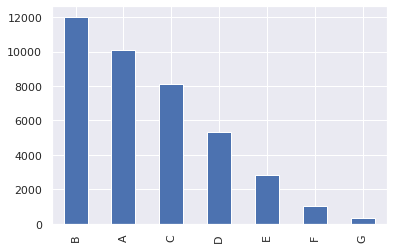

In [9]:
df['grade'].value_counts().plot.bar()

In [10]:
dummies = pd.concat([pd.get_dummies(df['grade'], prefix='grade', drop_first=True),
           pd.get_dummies(df['sub_grade'], prefix='grade', drop_first=True),
           pd.get_dummies(df['verification_status'], prefix='grade', drop_first=True),
           pd.get_dummies(df['home_ownership'], prefix='grade', drop_first=True),
           pd.get_dummies(df['loan_status'], prefix='grade', drop_first=True),
           pd.get_dummies(df['purpose'], prefix='grade', drop_first=True),
           pd.get_dummies(df['addr_state'], prefix='grade', drop_first=True),
           pd.get_dummies(df['initial_list_status'], prefix='grade', drop_first=True),
          ],
         axis=1)

df = pd.concat([df, dummies], axis=1)

In [11]:
df['annual_inc'] = df['annual_inc'].fillna(df['annual_inc'].mean())

In [12]:
cols = ['mths_since_issue_d',
'acc_now_delinq',
'total_acc',
'pub_rec',
'open_acc',
'inq_last_6mths',
'delinq_2yrs',
       'emp_length_num']

for c in cols:
    df[c] = df[c].fillna(0)

In [13]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [14]:
# Good bad classified
df['Good_Bad'] = np.where(df['loan_status'].isin(['Charged Off']), 0, 1)
df[['Good_Bad', 'loan_status']]

,Good_Bad,loan_status
0,1,Fully Paid
1,0,Charged Off
2,1,Fully Paid
3,1,Fully Paid
4,1,Current
...,...,...
39712,1,Fully Paid
39713,1,Fully Paid
39714,1,Fully Paid
39715,1,Fully Paid


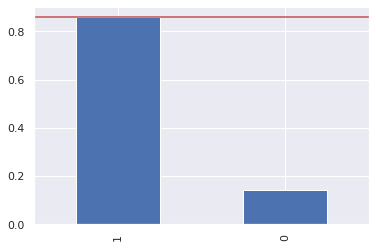

In [15]:
(df.Good_Bad.value_counts()/len(df)).plot.bar();
plt.axhline((df.Good_Bad.value_counts()/len(df)).max(), c='r')


<AxesSubplot:xlabel='grade'>

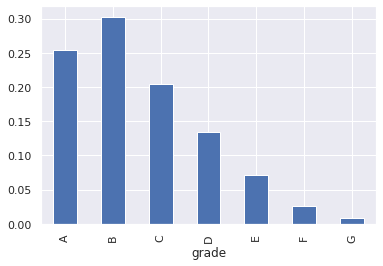

In [16]:
# proportion of GOOD & BAD together per grade
(df.groupby('grade')['Good_Bad'].count() / df.groupby('grade')['Good_Bad'].count().sum())\
.plot.bar()

<AxesSubplot:xlabel='grade'>

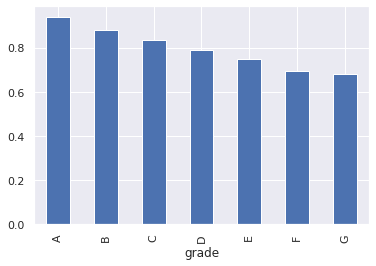

In [17]:
# Proportion of Good
(df.groupby('grade')['Good_Bad'].mean()).plot.bar()

In [18]:
df1 = pd.DataFrame(df.groupby('grade')['Good_Bad'].count())
df1.columns = ['n_obs'] 
# withing grade proportion of good
df1['good_prop'] = (df.groupby('grade')['Good_Bad'].mean())
df1['prop_n_obs'] = df1.n_obs / df1.n_obs.sum()
df1['n_good'] = df1['good_prop'] * df1['n_obs']
df1['n_bad'] = (1 - df1['good_prop']) * df1['n_obs']
# withing goods of all grade proportion of good per grade
df1['prop_n_good'] = df1.n_good / df1.n_good.sum()
df1['prop_n_bad'] = df1.n_bad / df1.n_bad.sum()
df1['WoE'] = np.log(df1['prop_n_good'] / df1['prop_n_bad'])
df1

,n_obs,good_prop,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
grade,,,,,,,,
A,10085,0.940307,0.253921,9483.0,602.0,0.278175,0.106984,0.955571
B,12020,0.881448,0.302641,10595.0,1425.0,0.310795,0.253243,0.204783
C,8098,0.833663,0.203893,6751.0,1347.0,0.198035,0.239382,-0.189617
D,5307,0.789335,0.133620,4189.0,1118.0,0.122881,0.198685,-0.480507
E,2842,0.748417,0.071556,2127.0,715.0,0.062394,0.127066,-0.711242
F,1049,0.695901,0.026412,730.0,319.0,0.021414,0.056691,-0.973574
G,316,0.680380,0.007956,215.0,101.0,0.006307,0.017949,-1.045910


```df.groupby('grade')['Good_Bad'].count() - df.groupby('grade')['Good_Bad'].sum()```

This could directly calculate n_good and analogous way we could get n_bad too :)

In [19]:
df1['IV'] = ((df1['prop_n_good'] -  df1['prop_n_bad']) * df1.WoE).sum()
df1

,n_obs,good_prop,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
grade,,,,,,,,,
A,10085,0.940307,0.253921,9483.0,602.0,0.278175,0.106984,0.955571,0.312155
B,12020,0.881448,0.302641,10595.0,1425.0,0.310795,0.253243,0.204783,0.312155
C,8098,0.833663,0.203893,6751.0,1347.0,0.198035,0.239382,-0.189617,0.312155
D,5307,0.789335,0.133620,4189.0,1118.0,0.122881,0.198685,-0.480507,0.312155
E,2842,0.748417,0.071556,2127.0,715.0,0.062394,0.127066,-0.711242,0.312155
F,1049,0.695901,0.026412,730.0,319.0,0.021414,0.056691,-0.973574,0.312155
G,316,0.680380,0.007956,215.0,101.0,0.006307,0.017949,-1.045910,0.312155


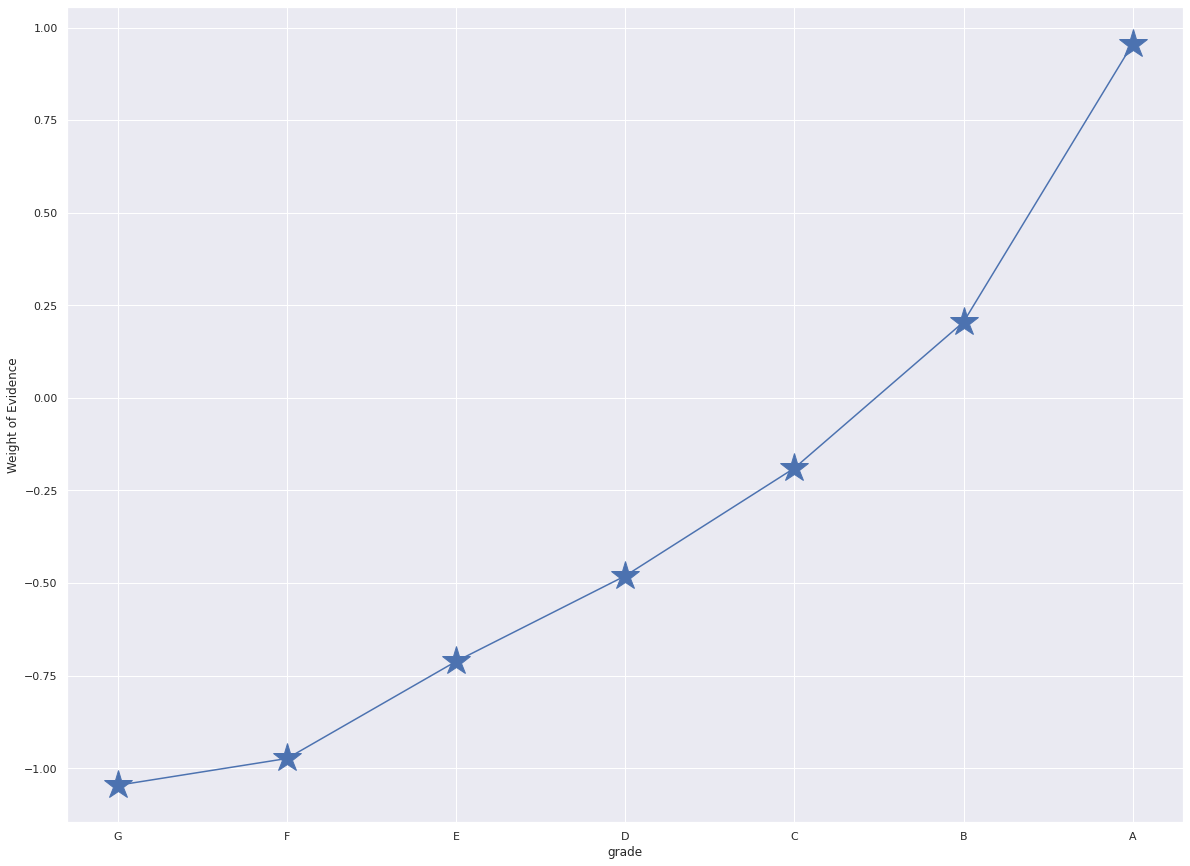

In [20]:
# Define a woe function which perform the same for any categorical variable (eg GRADE)

def get_woe(df, cat_col, target):
    df = pd.concat([df[cat_col], df[target]], axis=1)
    # df = pd.concat([df[cat_col], df[target]], axis=1)
    df1 = pd.DataFrame(df.groupby(cat_col)[target].sum())
    # df1
    df1.columns = ['n_good']
    #     df['n_good'] = df.groupby(cat_col)[target].sum()
    df1['n_bad'] = df.groupby(cat_col)[target].count() - df.groupby(cat_col)[target].sum()
    df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
    df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()
    df1['WoE'] = np.log(df1['prop_n_good'] / df1['prop_n_bad'])
    df1['IV'] = ((df1['prop_n_good'] -  df1['prop_n_bad']) * df1.WoE).sum()
    return df1.sort_values('WoE')

def plot_woe(df):
    plt.figure(figsize=(20,15))
    plt.plot(df.index, df.WoE, marker='*', ms = 30)
    plt.xlabel(df.index.name)
    plt.ylabel('Weight of Evidence')
#     plt.title()

df1 = get_woe(df, 'grade', 'Good_Bad')
plot_woe(df1)

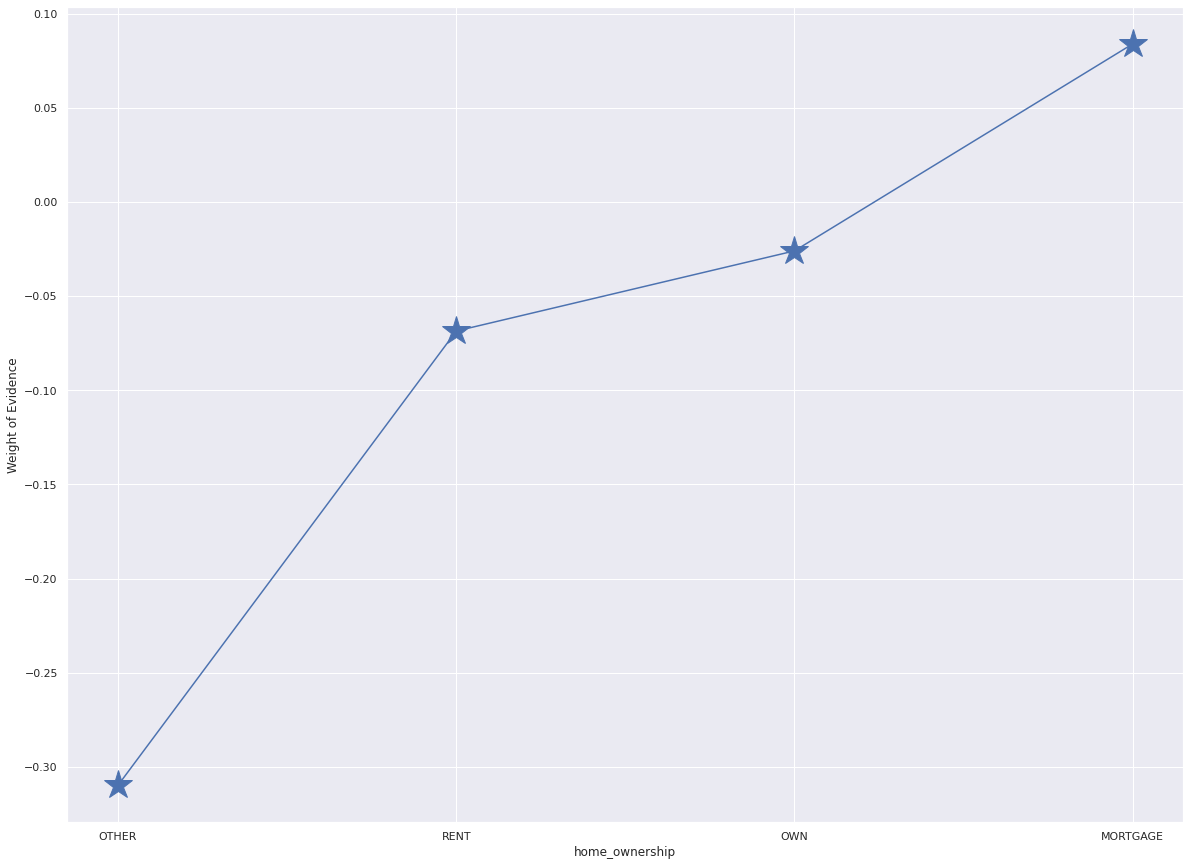

In [21]:
df2 = get_woe(df, 'home_ownership', 'Good_Bad')
plot_woe(df2)

In [22]:
df2

,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
home_ownership,,,,,,
OTHER,80,18,0.002347,0.003199,-0.309773,inf
RENT,16060,2839,0.471106,0.504532,-0.068548,inf
OWN,2615,443,0.076709,0.078728,-0.025978,inf
MORTGAGE,15332,2327,0.449751,0.413542,0.083935,inf
NONE,3,0,0.000088,0.000000,inf,inf


In [23]:
cat_col, target = 'grade', 'Good_Bad'
df = df.copy()
df = pd.concat([df[cat_col], df[target]], axis=1)
df = df.groupby(cat_col, as_index=False)[target].sum()
# df['n_good'] = df.groupby(cat_col, as_index=False)[target].sum()
# df['n_bad'] = df.groupby(cat_col)[target].count() - df.groupby(cat_col)[target].sum()
# df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
# df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
# df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
# df['IV'] = ((df['prop_n_good'] -  df['prop_n_bad']) * df.WoE).sum()
# # return df
df

,grade,Good_Bad
0,A,9483
1,B,10595
2,C,6751
3,D,4189
4,E,2127
5,F,730
6,G,215


In [24]:
df.groupby(cat_col, as_index=False)[target].sum()

,grade,Good_Bad
0,A,9483
1,B,10595
2,C,6751
3,D,4189
4,E,2127
5,F,730
6,G,215
